<a href="https://colab.research.google.com/github/Jallen101181/CS4410/blob/main/Allen_CS4410_Homework_7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Joseph Brandon Allen CS4410 Homework 7-1 16.1

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
sns.set(font_scale=2)

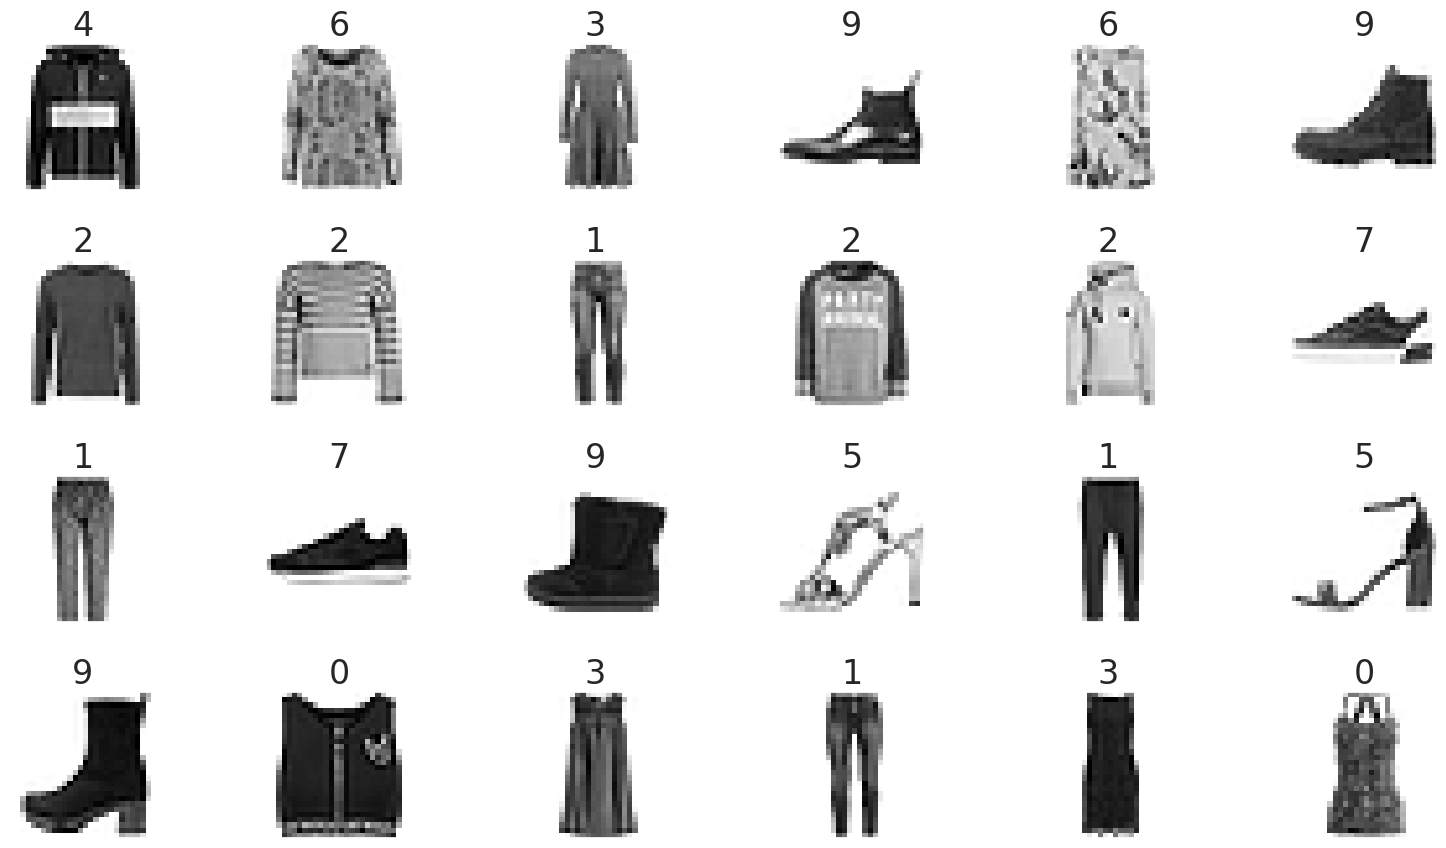

In [7]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([]) # remove x-axis tick marks
  axes.set_yticks([]) # remove y-axis tick marks
  axes.set_title(target)
plt.tight_layout()

In [8]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [9]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [10]:
X_train = X_train.astype('float32') / 255

In [11]:
X_test = X_test.astype('float32') / 255

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train)

In [14]:
y_test = to_categorical(y_test)

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
cnn = Sequential()

In [17]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [18]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
 input_shape=(28, 28, 1)))

In [19]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [20]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [21]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
cnn.add(Flatten())

In [23]:
cnn.add(Dense(units=128, activation='relu'))

In [24]:
cnn.add(Dense(units=10, activation='softmax'))

In [25]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

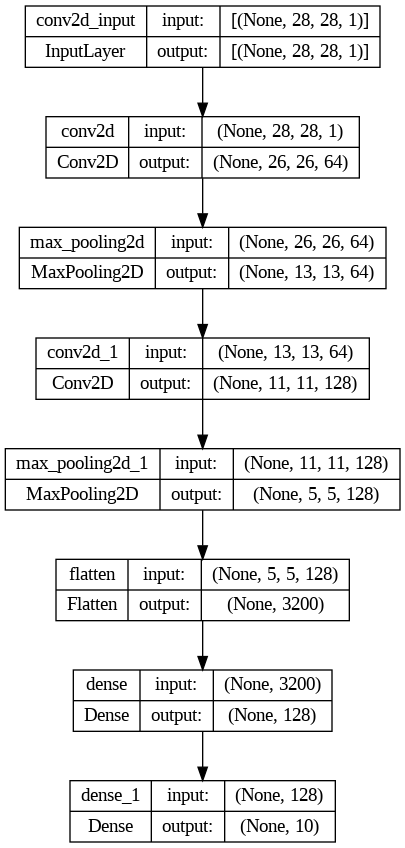

In [26]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
  show_layer_names=True)
Image(filename='convnet.png')

In [27]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [28]:
y_train.shape

(60000, 10)

In [29]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 119s 140ms/step - loss: 0.4678 - accuracy: 0.8309 - val_loss: 0.3318 - val_accuracy: 0.8805
Epoch 2/5
844/844 [==============================] - 115s 137ms/step - loss: 0.3091 - accuracy: 0.8883 - val_loss: 0.2964 - val_accuracy: 0.8945
Epoch 3/5
844/844 [==============================] - 111s 131ms/step - loss: 0.2583 - accuracy: 0.9049 - val_loss: 0.2572 - val_accuracy: 0.9040
Epoch 4/5
844/844 [==============================] - 113s 134ms/step - loss: 0.2259 - accuracy: 0.9157 - val_loss: 0.2608 - val_accuracy: 0.9045
Epoch 5/5
844/844 [==============================] - 114s 135ms/step - loss: 0.1965 - accuracy: 0.9269 - val_loss: 0.2424 - val_accuracy: 0.9130


In [30]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.2561 - accuracy: 0.9063


In [31]:
loss

0.25614693760871887

In [32]:
accuracy

0.9063000082969666

The model took around 30 seconds longer to train on Fashion-MNIST than it did the regular MNIST. It was also almost 9% less accurate (down to 90% from 99%). It appears that this model would need better tuning to work as well with this dataset.